<a href="https://colab.research.google.com/github/dlmacedo/deep-learning-class/blob/master/FireNet_tf_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Codigo Base

Clonar repositorio

In [0]:
!git clone https://github.com/angel-ayala/kutralnet.git

Cloning into 'kutralnet'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 455 (delta 0), reused 2 (delta 0), pack-reused 449
Receiving objects: 100% (455/455), 59.39 MiB | 38.69 MiB/s, done.
Resolving deltas: 100% (225/225), done.


Dependencies install

In [0]:
!apt-get -qq install imagemagick # required for image transform
!pip install git+https://github.com/angel-ayala/octconv.git # octave convolution library

Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 145674 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1) ...
Selecting previously unselected package liblqr-1-0:amd64.
Preparing to unpack .../01-liblqr-1-0_0.4.2-2.1_amd64.deb ...
Unpacking liblqr-1-0:amd64 (0.4.2-2.1) ...
Selecting previously unselected package imagemagick-6-common.
Preparing to unpack .../02-imagemagick-6-common_8%3a6.9.7.4+dfsg-16ubuntu6.8_all.deb ...
Unpacking imagemagick-6-common (8:6.9.7.4+dfsg-16ubuntu6.8) ...
Selecting previously unselected package libmagickcore-6.q16-3:amd64.
Preparing to unpack .../03-libmagickcore-6.q16-3_8%3a6.9.7.4+dfsg-16ubuntu6.8_amd64.deb ...
Unpacking libmagickcore-6.q16-3:amd64 (8:6.9.7.4+dfsg-16ubuntu6.8) ...
Selecting previously unselected package libmagickwand-6.q16-3:amd64.
Preparing to unpack .../04-libmagickwand-6.q16-3_8%3a6.9.

In [0]:
# work on repository folder
import os
os.chdir('/content/kutralnet')  #change dir

Obtener datasets

In [0]:
#firenet
os.chdir('/content/kutralnet/datasets/FireNetDataset')  #change dir
!./download.sh

Starting download of dataset...
Cannot open cookies file ‘gdown.cookie.temp’: No such file or directory
--2020-01-27 21:17:54--  https://docs.google.com/uc?id=165fUt_SiS50syL8QtdON50D_uyudcsrW&export=download
Resolving docs.google.com (docs.google.com)... 172.217.212.113, 172.217.212.138, 172.217.212.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./training.zip’

     0K                                     40.4M=0s

2020-01-27 21:17:54 (40.4 MB/s) - ‘./training.zip’ saved [3255]

--2020-01-27 21:17:54--  https://docs.google.com/uc?export=download&confirm=gcCV&id=165fUt_SiS50syL8QtdON50D_uyudcsrW
Resolving docs.google.com (docs.google.com)... 172.217.214.113, 172.217.214.102, 172.217.214.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: http

In [0]:
#fismo
os.chdir('/content/kutralnet/datasets/FiSmoDataset')  #change dir
!./download.sh

Starting download of dataset...
Cannot open cookies file ‘gdown.cookie.temp’: No such file or directory
--2020-01-27 21:18:10--  https://docs.google.com/uc?id=1Cq9KGYzmQ2IlFnkWyji-03DSJWZY36jS&export=download
Resolving docs.google.com (docs.google.com)... 172.217.214.138, 172.217.214.102, 172.217.214.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./FiSmo-Images.zip’

     0K                                     49.2M=0s

2020-01-27 21:18:10 (49.2 MB/s) - ‘./FiSmo-Images.zip’ saved [3251]

--2020-01-27 21:18:10--  https://docs.google.com/uc?export=download&confirm=I1gn&id=1Cq9KGYzmQ2IlFnkWyji-03DSJWZY36jS
Resolving docs.google.com (docs.google.com)... 172.217.214.138, 172.217.214.102, 172.217.214.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Locati

In [0]:
# back to home
os.chdir('/content/kutralnet')  #change dir

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

# Training

In [0]:
#tensorflow
import os
import time
import numpy as np
# from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.models import load_model

from sklearn.metrics import classification_report
from models.firenet_tf import firenet_tf
from utils.dataset import load_dataset
from utils.dataset import load_firenet_test_dataset
from utils.dataset import preprocess
from utils.training import plot_history
from contextlib import redirect_stdout

# Set a seed value
seed_value= 666
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.set_random_seed(seed_value)
# 5. For layers that introduce randomness like dropout, make sure to set seed values
# model.add(Dropout(0.25, seed=seed_value))
#6 Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)
%tensorflow_version 1.x 

must_train = True
must_test = True
base_model = 'firenet_tf'
dataset = 'fismo_black' # int(time.time())
ds_folder, get_dataset = load_dataset(dataset)
save_path = os.path.join('.', 'models', 'saved', base_model, dataset)
if not os.path.exists(save_path):
    os.makedirs(save_path)

Using TensorFlow backend.


In [0]:
# flops measure

def get_flops(model):
    run_meta = tf.RunMetadata()
    opts = tf.profiler.ProfileOptionBuilder.float_operation()

    # We use the Keras session graph in the call to the profiler.
    flops = tf.profiler.profile(graph=K.get_session().graph,
                                run_meta=run_meta, cmd='op', options=opts)

    return flops.total_float_ops  # Prints the "flops" of the model.

In [0]:
model = firenet_tf(input_shape=(64, 64, 3))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(get_flops(model))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
1292659


In [0]:
model2 = firenet_tf(input_shape=(64, 64, 3))
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(get_flops(model))

2585318


In [0]:
model3 = firenet_tf(input_shape=(64, 64, 3))
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(get_flops(model))

3877977


Loading FiSmoA with (64, 64) dimension
Loading images...
Ok
x_train shape: (5238, 64, 64, 3)
5238 train samples
1603 fire
3635 no_fire
x_val shape: (1310, 64, 64, 3)
1310 test samples
401 fire
909 no_fire
num_classes 2 input_shape (64, 64, 3)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
average_pooling2d_6 (Average (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
average_pooling2d_7 (Average (None, 14, 14, 32)        0         
_________

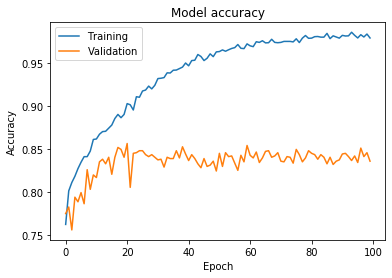

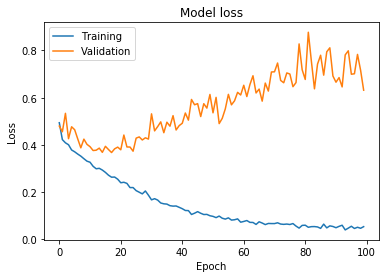

In [0]:
### Training
if must_train:
    ds_path = os.path.join('.', 'datasets', ds_folder)
    x_train, y_train, x_val, y_val = get_dataset(ds_path, resize=(64,64))

    # Normalize data.
    x_train = preprocess(x_train)
    x_val = preprocess(x_val)

    # summary
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(y_train[y_train==1].shape[0], 'fire')
    print(y_train[y_train==0].shape[0], 'no_fire')

    print('x_val shape:', x_val.shape)
    print(x_val.shape[0], 'test samples')
    print(y_val[y_val==1].shape[0], 'fire')
    print(y_val[y_val==0].shape[0], 'no_fire')

    num_classes = 2
    input_shape = x_train.shape[1:]
    print('num_classes', num_classes, 'input_shape', input_shape)

    # Convert class vectors to binary class matrices.
    # y_train = utils.to_categorical(y_train, num_classes)
    # y_val = utils.to_categorical(y_val, num_classes)

    def prepare_callbacks(save_dir, suffix):
        # Prepare model model saving directory.
        model_name = 'model_%s.h5' % suffix
        history_name = 'history.csv'

        if not os.path.isdir(save_dir):
            os.makedirs(save_dir)

        filepath = os.path.join(save_dir, model_name)
        historypath = os.path.join(save_dir, history_name)

        # Prepare callbacks for saving and for learning rate adjustment.
        checkpoint = ModelCheckpoint(filepath=filepath,
                                     monitor='val_acc',
                                     verbose=1,
                                     save_best_only=True)

        csv_logger = CSVLogger(filename=historypath,
                                separator=',',
                                append=False)

        return [csv_logger, checkpoint]
    # end prepare_callbacks

    model = firenet_tf(input_shape=input_shape)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()
    # exit()
    #
    print('Initiating training, models will be saved at {}'.format(save_path))
    time_elapsed = 0
    since = time.time()
    with open(os.path.join(save_path, 'training.log'), 'a+') as f:
        with redirect_stdout(f):
            # since = time.time()
            history = model.fit(x_train, y_train, batch_size=32, epochs=100,
                    validation_data=(x_val, y_val), callbacks=prepare_callbacks(save_path, base_model))

            best_idx = np.argmax(history.history['val_acc'])
            best_acc = history.history['val_acc'][best_idx]

            time_elapsed = time.time() - since
            print('Training complete in {:.0f}m {:.0f}s'.format(
                time_elapsed // 60, time_elapsed % 60))
            print('Best accuracy on epoch {}: {:4f}'.format(best_idx, best_acc))

    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best accuracy on epoch {}: {:4f}'.format(best_idx, best_acc))

    plot_history(history.history, folder_path=save_path)


In [0]:
### Test
if must_test:
    firenet_path = os.path.join('.', 'datasets', 'FireNetDataset')
    x_test, y_test = load_firenet_test_dataset(firenet_path, resize=(64,64))

    # Normalize data.
    x_test = preprocess(x_test)

    # summary
    print('x_test shape:', x_test.shape)
    print(x_test.shape[0], 'test samples')
    print(y_test[y_test==1].shape[0], 'fire')
    print(y_test[y_test==0].shape[0], 'no_fire')

    num_classes = 2
    input_shape = x_test.shape[1:]
    print('num_classes', num_classes, 'input_shape', input_shape)

    model = firenet_tf(input_shape=input_shape)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.load_weights(os.path.join(save_path, 'model_{}.h5'.format(base_model)))

    score = model.evaluate(x_test, y_test, verbose=2)

    #Confusion Matrix and Classification Report
    y_pred = model.predict(x_test, verbose=0)
    y_class = np.argmax(y_pred, axis=1)
    # Y_test = np.argmax(y_test, axis=1)

    target_names = ['No Fire', 'Fire']
    class_report = classification_report(y_test, y_class,
                            target_names=target_names)#, output_dict=True)

    with open(os.path.join(save_path, 'test.log'), 'a+') as f:
        with redirect_stdout(f):
            print(score)
            print('Classification Report')
            print(class_report)


Loading FireNet-Test with (64, 64) dimension
Loading images...
Ok
x_test shape: (871, 64, 64, 3)
871 test samples
593 fire
278 no_fire
num_classes 2 input_shape (64, 64, 3)
871/871 - 0s - loss: 0.7402 - acc: 0.5993
